In [1]:
from __future__ import print_function
import numpy as np
import cv2 as cv
from cv2 import dnn
import timeit

In [21]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
# Thanks to showarray.py 
# from https://gist.github.com/kylemcdonald/2f1b9a255993bf9b2629
# Minimal code for rendering a numpy array 
# as an image in a Jupyter notebook in memory

def timeit_forward(net): # if you need to time it
    print("Runtime:", timeit.timeit(lambda: net.forward(), number=10))

In [2]:
classNames = [ "__background__", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

In [3]:
kInpWidth = 800
kInpHeight = 600

In [4]:
protoPath = "faster_rcnn_vgg16.prototxt"
modelPath = "VGG16_faster_rcnn_final.caffemodel"
imagePath = "street.jpg"
confThreshold = 0.8

In [5]:
net = dnn.readNetFromCaffe(protoPath, modelPath)

In [23]:
img = cv.imread(imagePath)
img = cv.resize(img, (kInpWidth, kInpHeight))
blob = dnn.blobFromImage(img, 1.0, None, (102.9801, 115.9465, 122.7717), False, False)
print("Input:", blob.shape, blob.dtype)

Input: (1L, 3L, 600L, 800L) float32


In [7]:
imInfo = np.array([600, 800, 1.6]).reshape([1,3]).astype('float32')
print("imInfo:", imInfo.shape, imInfo.dtype)

imInfo: (1L, 3L) float32


In [8]:
net.setInput(blob,"data")
net.setInput(imInfo, "im_info")

In [9]:
detections = net.forward()

In [24]:
data = detections[0][0]
for i in range(len(data)):
    # An every detection is a vector [id, classId, confidence, left, top, right, bottom]
    confidence = data[i][2]
    if confidence>confThreshold:
        classId = data[i][1]
        left = max(0, min(int(data[i][3]), kInpWidth-1))
        top = max(0, min(int(data[i][4]), kInpHeight-1))
        right = max(0, min(int(data[i][5]), kInpWidth-1))
        bottom = max(0, min(int(data[i][6]), kInpHeight-1))
        
        cv.rectangle(img, (left, top), (right, bottom), [0,255,0])
        label = '{}, {:.3}'.format(classNames[int(classId)], confidence)
        labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
        width = labelSize[0]; height = labelSize[1]
        top = max(top, height)
        cv.rectangle(img, (left, top-height), (left+width, top+baseLine), [255,255,255], cv.FILLED)
        cv.putText(img, label, (left,top), cv.FONT_HERSHEY_SIMPLEX, 0.5, [0,0,0])        

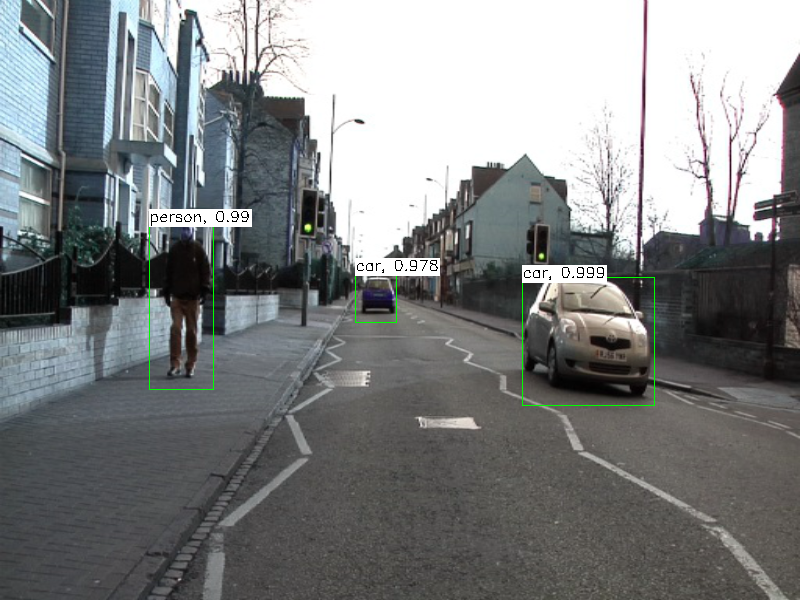

In [25]:
showarray(img)